In [ ]:
import pandas as pd
import numpy as np
import os

# 定义源文件路径 
data_path = os.path.join('data', 'raw')

boun_tcp_path = os.path.join(data_path, 'BOUN_TCP_Anon.csv')
boun_udp_path = os.path.join(data_path, 'BOUN_UDP_Anon.csv')
buet_train_path = os.path.join(data_path, 'BUET_train.csv')
buet_test_path = os.path.join(data_path, 'BUET_test.csv')

In [ ]:
# 加载BOUN数据集 最先进 包括TCPSYN-flood、UDP-flood、Legitimate三类数据
boun_udp_df = pd.read_csv(boun_udp_path)
boun_tcp_df = pd.read_csv(boun_tcp_path)

# 验证BOUN数据集两个文件的区别
# 猜测：BOUN_TCP_Anon 中的攻击记录协议均为TCP，且SYN标志位Set；BOUN_UDP_Anon 中攻击协议记录均为UDP
# 若验证失败，需要修正攻击判定逻辑
print("--- 开始验证 BOUN 数据集攻击类型 ---")

# 1. 验证 BOUN_TCP_Anon 文件
print("\n[1] 正在分析 BOUN_TCP_Anon 文件...")

# 筛选出攻击时段的数据 (80s <= Time % 100 < 100s)
tcp_attack_period_df = boun_tcp_df[boun_tcp_df['Time'] % 100 >= 80]

if not tcp_attack_period_df.empty:
    # 获取攻击时段内，TCP_Protocol 列的所有唯一值
    # 使用 .dropna() 是为了去除可能存在的空值，尽管在TCP攻击中理论上不应有
    tcp_attack_protocols = tcp_attack_period_df['TCP_Protocol'].dropna().unique()
    
    print(f"在 BOUN_TCP_Anon 的攻击时段内，共找到 {len(tcp_attack_period_df)} 条记录。")
    print(f"这些攻击记录中包含的协议类型有: {tcp_attack_protocols}")
    
    if len(tcp_attack_protocols) == 1 and tcp_attack_protocols[0] == 'TCP':
        print("✅ 验证成功: BOUN_TCP_Anon 文件中的攻击流量确实全部是 TCP 协议。")
    else:
        print("❌ 验证失败: BOUN_TCP_Anon 文件中的攻击流量包含了非 TCP 协议，或者没有找到攻击流量。")
else:
    print("⚠️ 警告: 在 BOUN_TCP_Anon 文件中未能根据时间筛选出任何攻击时段的数据。")


# 2. 验证 BOUN_UDP_Anon 文件
print("\n[2] 正在分析 BOUN_UDP_Anon 文件...")

# 筛选出攻击时段的数据
udp_attack_period_df = boun_udp_df[boun_udp_df['Time'] % 100 >= 80]

if not udp_attack_period_df.empty:
    # 获取攻击时段内，TCP_Protocol 列的所有唯一值
    udp_attack_protocols = udp_attack_period_df['TCP_Protocol'].dropna().unique()

    print(f"在 BOUN_UDP_Anon 的攻击时段内，共找到 {len(udp_attack_period_df)} 条记录。")
    print(f"这些攻击记录中包含的协议类型有: {udp_attack_protocols}")

    if len(udp_attack_protocols) == 1 and udp_attack_protocols[0] == 'UDP':
        print("✅ 验证成功: BOUN_UDP_Anon 文件中的攻击流量确实全部是 UDP 协议。")
    else:
        print("❌ 验证失败: BOUN_UDP_Anon 文件中的攻击流量包含了非 UDP 协议，或者没有找到攻击流量。")
else:
    print("⚠️ 警告: 在 BOUN_UDP_Anon 文件中未能根据时间筛选出任何攻击时段的数据。")

print("\n--- 验证结束 ---")

# 额外验证：检查 TCP 攻击包的 SYN 标志位
print("\n[额外验证] 正在检查 TCP 攻击包的 SYN 标志位...")
# .all() 会检查筛选出的所有行的SYN列是否都为'Set'
if 'SYN' in tcp_attack_period_df.columns:
    if tcp_attack_period_df['SYN'].eq('Set').all():
        print("✅ 验证成功: BOUN_TCP_Anon 文件中所有攻击包的 SYN 标志位均为 'Set'。")
    else:
        print("❌ 验证失败: BOUN_TCP_Anon 文件中并非所有攻击包的 SYN 标志位均为 'Set'。")
else:
    print("⚠️ 警告: 在 BOUN_TCP_Anon 文件中找不到 'SYN' 列。")

--- 开始验证 BOUN 数据集攻击类型 ---

[1] 正在分析 BOUN_TCP_Anon 文件...
在 BOUN_TCP_Anon 的攻击时段内，共找到 1575288 条记录。
这些攻击记录中包含的协议类型有: ['TCP' 'UDP' 'Generic Routing Encapsulation' 'ICMP,UDP' 'IGMP' 'ICMP'
 'ICMP,TCP' 'IPv6' 'ICMP,ICMP']
❌ 验证失败: BOUN_TCP_Anon 文件中的攻击流量包含了非 TCP 协议，或者没有找到攻击流量。

[2] 正在分析 BOUN_UDP_Anon 文件...
在 BOUN_UDP_Anon 的攻击时段内，共找到 1576771 条记录。
这些攻击记录中包含的协议类型有: ['TCP' 'UDP' 'Generic Routing Encapsulation' 'ICMP' 'ICMP,UDP' 'IGMP'
 'ICMP,ICMP' 'ICMP,TCP' 'IPv6']
❌ 验证失败: BOUN_UDP_Anon 文件中的攻击流量包含了非 UDP 协议，或者没有找到攻击流量。

--- 验证结束 ---

[额外验证] 正在检查 TCP 攻击包的 SYN 标志位...
❌ 验证失败: BOUN_TCP_Anon 文件中并非所有攻击包的 SYN 标志位均为 'Set'。


In [13]:
# 定义受害者IP
VICTIM_IP = '10.50.199.86' 

print("--- 开始使用修正后的逻辑进行验证 ---")

# 1. 验证 BOUN_TCP_Anon 文件
print(f"\n[1] 正在分析 BOUN_TCP_Anon 文件 (目标IP: {VICTIM_IP})...")

# 筛选出真正的攻击包：同时满足时间和目标IP条件
true_tcp_attack_df = boun_tcp_df[
    (boun_tcp_df['Time'] % 100 >= 80) & 
    (boun_tcp_df['Destination_IP'] == VICTIM_IP)
]

if not true_tcp_attack_df.empty:
    tcp_attack_protocols = true_tcp_attack_df['TCP_Protocol'].dropna().unique()
    
    print(f"在 BOUN_TCP_Anon 中，共找到 {len(true_tcp_attack_df)} 条真正的攻击记录。")
    print(f"这些攻击记录中包含的协议类型有: {tcp_attack_protocols}")
    
    if len(tcp_attack_protocols) == 1 and tcp_attack_protocols[0] == 'TCP':
        print("✅ 验证成功: 识别出的攻击流量确实全部是 TCP 协议。")
        
        # 额外验证 SYN 标志位
        if 'SYN' in true_tcp_attack_df.columns and true_tcp_attack_df['SYN'].eq('Set').all():
            print("✅ 额外验证成功: 所有 TCP 攻击包的 SYN 标志位均为 'Set'。")
        else:
            print("❌ 额外验证失败: 并非所有 TCP 攻击包的 SYN 标志位均为 'Set'。")
    else:
        print("❌ 验证失败: 识别出的攻击流量包含了非 TCP 协议。")
else:
    print("⚠️ 警告: 未能找到任何满足条件的攻击数据。")


# 2. 验证 BOUN_UDP_Anon 文件
print(f"\n[2] 正在分析 BOUN_UDP_Anon 文件 (目标IP: {VICTIM_IP})...")

# 筛选出真正的攻击包
true_udp_attack_df = boun_udp_df[
    (boun_udp_df['Time'] % 100 >= 80) & 
    (boun_udp_df['Destination_IP'] == VICTIM_IP)
]

if not true_udp_attack_df.empty:
    udp_attack_protocols = true_udp_attack_df['TCP_Protocol'].dropna().unique()

    print(f"在 BOUN_UDP_Anon 中，共找到 {len(true_udp_attack_df)} 条真正的攻击记录。")
    print(f"这些攻击记录中包含的协议类型有: {udp_attack_protocols}")

    if len(udp_attack_protocols) == 1 and udp_attack_protocols[0] == 'UDP':
        print("✅ 验证成功: 识别出的攻击流量确实全部是 UDP 协议。")
    else:
        print("❌ 验证失败: 识别出的攻击流量包含了非 UDP 协议。")
else:
    print("⚠️ 警告: 未能找到任何满足条件的攻击数据。")

print("\n--- 验证结束 ---")

--- 开始使用修正后的逻辑进行验证 ---

[1] 正在分析 BOUN_TCP_Anon 文件 (目标IP: 10.50.199.86)...
在 BOUN_TCP_Anon 中，共找到 114012 条真正的攻击记录。
这些攻击记录中包含的协议类型有: ['TCP']
✅ 验证成功: 识别出的攻击流量确实全部是 TCP 协议。
✅ 额外验证成功: 所有 TCP 攻击包的 SYN 标志位均为 'Set'。

[2] 正在分析 BOUN_UDP_Anon 文件 (目标IP: 10.50.199.86)...
在 BOUN_UDP_Anon 中，共找到 221822 条真正的攻击记录。
这些攻击记录中包含的协议类型有: ['UDP']
✅ 验证成功: 识别出的攻击流量确实全部是 UDP 协议。

--- 验证结束 ---


In [14]:
# 合并两个DataFrame
boun_df = pd.concat([boun_tcp_df, boun_udp_df], ignore_index=True)

# --- 为合并后的 boun_df 数据集打标签 ---
print("开始为合并后的数据集 boun_df 打标签...")

# 1. 定义受害者IP地址
VICTIM_IP = '10.50.199.86'

# 2. 初始化 'Label' 列
boun_df['Label'] = 'Legitimate'
print(f"已初始化 'Label' 列，默认所有 {len(boun_df)} 条记录为 'Legitimate'。")

# 3. 创建布尔掩码来识别不同类型的攻击
#    条件1: 时间戳是否在攻击窗口内
is_in_attack_window = (boun_df['Time'] % 100 >= 80)

# 条件2: 目标IP是否是受害者
is_targeting_victim = (boun_df['Destination_IP'] == VICTIM_IP)

# 条件3: 协议是否为TCP
is_tcp_protocol = (boun_df['TCP_Protocol'] == 'TCP')

# 条件4: 协议是否为UDP
is_udp_protocol = (boun_df['TCP_Protocol'] == 'UDP')


# 4. 组合条件，识别并标记 TCPSYN-flood 攻击
#    必须同时满足：在攻击窗口内 & 目标是受害者 & 协议是TCP
tcp_flood_mask = is_in_attack_window & is_targeting_victim & is_tcp_protocol

# 使用 .loc 更新标签
boun_df.loc[tcp_flood_mask, 'Label'] = 'TCPSYN-flood'
tcp_attack_count = tcp_flood_mask.sum()
print(f"已识别并标记 {tcp_attack_count} 条记录为 'TCPSYN-flood'。")


# 5. 组合条件，识别并标记 UDP-flood 攻击
#    必须同时满足：在攻击窗口内 & 目标是受害者 & 协议是UDP
udp_flood_mask = is_in_attack_window & is_targeting_victim & is_udp_protocol

# 使用 .loc 更新标签
boun_df.loc[udp_flood_mask, 'Label'] = 'UDP-flood'
udp_attack_count = udp_flood_mask.sum()
print(f"已识别并标记 {udp_attack_count} 条记录为 'UDP-flood'。")

# --- 验证打标签的结果 ---
print("\n--- 正在验证标签结果 ---")
label_distribution = boun_df['Label'].value_counts()
print("标签分布情况:")
print(label_distribution)

# 计算并打印正常流量的数量
legitimate_count = label_distribution.get('Legitimate', 0)
total_count = len(boun_df)

# 进行一个简单的健全性检查
if (legitimate_count + tcp_attack_count + udp_attack_count) == total_count:
    print("\n✅ 验证成功：所有记录都已被分类，总数匹配。")
else:
    print("\n❌ 验证失败：各类别数量之和与总记录数不匹配，请检查逻辑。")

开始为合并后的数据集 boun_df 打标签...
已初始化 'Label' 列，默认所有 17382940 条记录为 'Legitimate'。
已识别并标记 114012 条记录为 'TCPSYN-flood'。
已识别并标记 221822 条记录为 'UDP-flood'。

--- 正在验证标签结果 ---
标签分布情况:
Label
Legitimate      17047106
UDP-flood         221822
TCPSYN-flood      114012
Name: count, dtype: int64

✅ 验证成功：所有记录都已被分类，总数匹配。


In [15]:
# --- 对 BOUN 数据集的 Legitimate 类进行下采样以匹配论文档案 ---

# 1. 设置采样开关和目标数量
#    设置为 True: 执行下采样，使总样本数与论文一致。
#    设置为 False: 跳过采样，使用所有原始数据。
ENABLE_BOUN_LEGITIMATE_SAMPLING = True

# 论文中提到的 BOUN 数据集总样本数
TOTAL_SAMPLES_IN_PAPER = 3342662

print("\n--- [采样步骤] ---")
if ENABLE_BOUN_LEGITIMATE_SAMPLING:
    print(f"[INFO] 已启用对 BOUN 数据集中 Legitimate 类的下采样。")
    print(f"[INFO] 目标总样本数: {TOTAL_SAMPLES_IN_PAPER}")

    # 2. 计算需要保留的 Legitimate 样本数量
    #    从已计算的标签分布中获取攻击流量的数量
    tcp_attack_count = label_distribution.get('TCPSYN-flood', 0)
    udp_attack_count = label_distribution.get('UDP-flood', 0)
    current_legitimate_count = label_distribution.get('Legitimate', 0)
    
    # 计算目标 Legitimate 样本数
    target_legitimate_count = TOTAL_SAMPLES_IN_PAPER - tcp_attack_count - udp_attack_count
    
    print(f" - TCPSYN-flood 数量: {tcp_attack_count}")
    print(f" - UDP-flood 数量   : {udp_attack_count}")
    print(f" - 需要保留的 Legitimate 数量: {TOTAL_SAMPLES_IN_PAPER} - {tcp_attack_count} - {udp_attack_count} = {target_legitimate_count}")

    # 3. 执行下采样
    #    合理校验：确保目标数量是有效的
    if target_legitimate_count < 0:
        print("\n❌ 错误：计算出的目标 Legitimate 数量为负数，请检查论文总数或攻击数量。采样中止。")
    elif target_legitimate_count > current_legitimate_count:
        print(f"\n⚠️ 警告：目标 Legitimate 数量 ({target_legitimate_count}) 大于当前可用数量 ({current_legitimate_count})。将保留所有 Legitimate 样本。")
    else:
        print(f"[INFO] 正在从 {current_legitimate_count} 条 Legitimate 记录中随机抽取 {target_legitimate_count} 条...")
        
        # 1. 分离 Legitimate 和攻击流量
        legitimate_df = boun_df[boun_df['Label'] == 'Legitimate']
        attack_df = boun_df[boun_df['Label'] != 'Legitimate']
        
        # 2. 对 Legitimate DataFrame 进行采样
        #    使用 random_state 确保每次运行结果一致
        sampled_legitimate_df = legitimate_df.sample(n=target_legitimate_count, random_state=42)
        
        # 3. 将采样后的 Legitimate 数据与所有攻击数据重新合并
        boun_df = pd.concat([sampled_legitimate_df, attack_df], ignore_index=True)
        
        # 4. 重新验证并打印最终的标签分布
        print("\n--- 正在验证采样后的标签结果 ---")
        final_label_distribution = boun_df['Label'].value_counts()
        print("采样后的标签分布情况:")
        print(final_label_distribution)
        
        final_total_count = len(boun_df)
        if final_total_count == TOTAL_SAMPLES_IN_PAPER:
             print(f"\n✅ 采样成功！数据集总样本数现在为 {final_total_count}，与论文一致。")
        else:
            print(f"\n❌ 采样验证失败！当前总样本数为 {final_total_count}，与目标不符。")

else:
    print("[INFO] 未启用下采样，将使用完整的 BOUN 数据集。")



--- [采样步骤] ---
[INFO] 已启用对 BOUN 数据集中 Legitimate 类的下采样。
[INFO] 目标总样本数: 3342662
 - TCPSYN-flood 数量: 114012
 - UDP-flood 数量   : 221822
 - 需要保留的 Legitimate 数量: 3342662 - 114012 - 221822 = 3006828
[INFO] 正在从 17047106 条 Legitimate 记录中随机抽取 3006828 条...

--- 正在验证采样后的标签结果 ---
采样后的标签分布情况:
Label
Legitimate      3006828
UDP-flood        221822
TCPSYN-flood     114012
Name: count, dtype: int64

✅ 采样成功！数据集总样本数现在为 3342662，与论文一致。


In [16]:
print("\n--- 开始统计不同攻击速率版本的样本数量 ---")

# 1. 筛选出所有的攻击流量
attack_df = boun_df[boun_df['Label'] != 'Legitimate'].copy()

if attack_df.empty:
    print("数据集中未找到攻击流量，无法进行统计。")
else:
    # 2. 为每个攻击包创建一个 'second' 列，用于按秒分组
    #    我们将时间戳向下取整，例如 80.123s, 80.987s 都会归为第 80 秒
    attack_df['second'] = attack_df['Time'].astype(int)

    # 3. 计算每个攻击秒内的攻击包数量
    rates_per_second = attack_df.groupby('second').size()
    
    print("\n计算出的每秒攻击速率（部分样本）:")
    print(rates_per_second.value_counts().sort_index().head(10)) # 显示前10个最常见的速率值
    # 4. 定义一个函数，将瞬时速率归类到四个版本中
    def classify_rate(rate):
        # 我们以两个标准速率的中间值为分界线
        if rate <= 1250: # (1000 + 1500) / 2 = 1250
            return "1000 pps"
        elif rate <= 1750: # (1500 + 2000) / 2 = 1750
            return "1500 pps"
        elif rate <= 2250: # (2000 + 2500) / 2 = 2250
            return "2000 pps"
        else:
            return "2500 pps"

    # 5. 为每个攻击秒确定其速率类别
    #    创建一个新的DataFrame，索引是'second'，包含'rate'和'rate_category'
    rate_analysis_df = pd.DataFrame(rates_per_second, columns=['rate'])
    rate_analysis_df['rate_category'] = rate_analysis_df['rate'].apply(classify_rate)
    
    # 6. 统计并输出结果
    print("\n--- 统计结果 ---")
    results = {}
    
    # 获取所有唯一的速率类别
    rate_categories = rate_analysis_df['rate_category'].unique()

    for category in sorted(rate_categories, key=lambda x: int(x.split()[0])):
        # 找到所有属于这个速率类别的“秒”
        seconds_in_category = rate_analysis_df[rate_analysis_df['rate_category'] == category].index
        
        # 筛选出在这些“秒”内发生的所有流量（攻击+背景）
        # 我们要用原始的 boun_df 来统计，因为它包含全部流量
        total_samples_in_category = boun_df[boun_df['Time'].astype(int).isin(seconds_in_category)]
        
        # 筛选出在这些“秒”内发生的攻击流量
        attack_samples_in_category = attack_df[attack_df['second'].isin(seconds_in_category)]
        
        results[category] = {
            'Total Samples (Attack + Background)': len(total_samples_in_category),
            'Attack Samples Only': len(attack_samples_in_category)
        }

    # 7. 格式化打印结果
    print("各个攻击速率版本包含的样本数量如下:")
    for category, counts in results.items():
        print(f"\n  版本: {category}")
        print(f"    - 总样本数 (攻击 + 背景): {counts['Total Samples (Attack + Background)' ]:,}")
        print(f"    - 仅攻击样本数:           {counts['Attack Samples Only']:,}")

    # 最终验证
    total_reported_attacks = sum(res['Attack Samples Only'] for res in results.values())
    initial_attack_count = len(attack_df)
    if total_reported_attacks == initial_attack_count:
        print("\n✅ 最终验证成功：统计到的攻击样本总数与初始筛选的攻击样本总数一致。")
    else:
        print(f"\n❌ 最终验证失败：统计数 {total_reported_attacks} 与初始数 {initial_attack_count} 不符。")


--- 开始统计不同攻击速率版本的样本数量 ---

计算出的每秒攻击速率（部分样本）:
897     1
1146    1
1829    1
2539    1
2542    1
2557    1
2558    1
2563    1
2566    1
2567    2
Name: count, dtype: int64

--- 统计结果 ---
各个攻击速率版本包含的样本数量如下:

  版本: 1000 pps
    - 总样本数 (攻击 + 背景): 13,183
    - 仅攻击样本数:           2,043

  版本: 2000 pps
    - 总样本数 (攻击 + 背景): 8,840
    - 仅攻击样本数:           1,829

  版本: 2500 pps
    - 总样本数 (攻击 + 背景): 784,908
    - 仅攻击样本数:           331,962

✅ 最终验证成功：统计到的攻击样本总数与初始筛选的攻击样本总数一致。


In [17]:
# 加载BUET数据集 包含六类 增加了ICMP-flood、DNS-flood、 HTTP-flood三类
buet_train_df = pd.read_csv(buet_train_path)
# 论文中只使用了训练集 样本数量969 401
buet_df = buet_train_df

# --- 数据集概览 ---
print(f"\n=== 数据集概览 ===")
print(f"BOUN dataset shape: {boun_df.shape}")
print(f"BOUN columns: {list(boun_df.columns)}")

print(f"\nBUET dataset shape: {buet_df.shape}")
print(f"BUET columns: {list(buet_df.columns)}")

# 显示部分数据
print(f"\nBOUN dataset head:")
print(boun_df.head())

print(f"\nBUET dataset head:")
print(buet_df.head())

C:\Users\张宸瑜\AppData\Local\Temp\ipykernel_27528\409832453.py:2: DtypeWarning: Columns (7,19,20,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  buet_train_df = pd.read_csv(buet_train_path)



=== 数据集概览 ===
BOUN dataset shape: (3342662, 13)
BOUN columns: ['Time', 'Frame Number', 'Frame_length', 'Source_ip', 'Destination_IP', 'Source_Port', 'Destination_Port', 'SYN', 'ACK', 'RST', 'TTL', 'TCP_Protocol', 'Label']

BUET dataset shape: (969401, 29)
BUET columns: ['timestamp', 'src_ip', 'dst_ip', 'protocol', 'length', 'src_port', 'dst_port', 'flag', 'seq_no', 'ack_no', 'win_size', 'len', 'mss', 'sack_perm', 'sle', 'sre', 'ws', 'tsval', 'tsecr', 'req_type', 'req_for', 'response_no', 'version', 'dns_query_response', 'tx_id', 'req_reply', 'ttl', 'req_resp_no', 'label']

BOUN dataset head:
         Time  Frame Number  Frame_length       Source_ip  Destination_IP  \
0  225.454097       3329233          1458  195.244.32.120   10.50.193.202   
1  477.685788       9249595            68    92.45.54.178   10.50.209.134   
2  438.615283       7146689           126   54.225.245.82  192.168.68.148   
3  355.161074       6985958           150    10.50.210.69    10.50.197.48   
4  361.427422  

In [18]:
print("========================================================")
print("===           BUET 数据集探索性数据分析 (EDA)          ===")
print("========================================================")

# --- 1. 基本信息 ---
print("\n--- 1. 基本信息 ---")
print(f"数据集形状 (行, 列): {buet_df.shape}")
# 使用 .info() 可以更全面地了解列、非空值和数据类型
print("\n各列信息及数据类型:")
buet_df.info()

# --- 2. 缺失值分析 ---
print("\n\n--- 2. 缺失值分析 ---")
missing_values = buet_df.isnull().sum()
missing_percentage = (missing_values / len(buet_df)) * 100
missing_info = pd.DataFrame({
    '缺失值数量': missing_values,
    '缺失百分比 (%)': missing_percentage
}).sort_values(by='缺失百分比 (%)', ascending=False)
print("每列的缺失值百分比:")
print(missing_info)
print("\n[提示] 具有高缺失率的列很可能是协议特定的。")
print("       例如，与DNS相关的列在TCP数据包中会是空的。")

# --- 3. 区分数值型和类别型特征 ---
numerical_cols = buet_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = buet_df.select_dtypes(include=['object', 'category']).columns.tolist()

# 我们将label列单独处理，所以从类别列中移除它
if 'label' in categorical_cols:
    categorical_cols.remove('label')

# --- 4. 数值型特征分析 ---
print("\n\n--- 4. 数值型特征统计摘要 ---")
if numerical_cols:
    # .transpose() 或 .T 可以让输出结果更易读
    print(buet_df[numerical_cols].describe().T)
else:
    print("未找到数值型特征。")

# --- 5. 类别型特征分析 ---
print("\n\n--- 5. 类别型特征分析 ---")
if categorical_cols:
    for col in categorical_cols:
        print(f"\n--- 正在分析列: '{col}' ---")
        unique_count = buet_df[col].nunique()
        print(f"唯一值数量: {unique_count}")
        
        # 为了避免输出过多内容，我们只显示最常见的前10个值
        print("最常见的10个值:")
        print(buet_df[col].value_counts().head(10))
else:
    print("未找到可供分析的类别型特征 (已排除 'label' 列)。")

# --- 6. 目标标签 (Label) 分析 ---
print("\n\n--- 6. 目标标签 ('label') 分布情况 ---")
if 'label' in buet_df.columns:
    label_counts = buet_df['label'].value_counts()
    label_percentages = (buet_df['label'].value_counts(normalize=True) * 100).round(2)
    label_distribution = pd.DataFrame({
        '样本数量': label_counts,
        '百分比 (%)': label_percentages
    })
    print("数据集中各类别的分布情况:")
    print(label_distribution)
else:
    print("未找到目标标签 'label' 列。")

print("\n\n========================================================")
print("===                   EDA 报告结束                   ===")
print("========================================================")

===           BUET 数据集探索性数据分析 (EDA)          ===

--- 1. 基本信息 ---
数据集形状 (行, 列): (969401, 29)

各列信息及数据类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969401 entries, 0 to 969400
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           969401 non-null  float64
 1   src_ip              969401 non-null  object 
 2   dst_ip              969401 non-null  object 
 3   protocol            969401 non-null  object 
 4   length              969401 non-null  int64  
 5   src_port            665506 non-null  float64
 6   dst_port            665506 non-null  float64
 7   flag                549662 non-null  object 
 8   seq_no              674537 non-null  float64
 9   ack_no              0 non-null       float64
 10  win_size            549662 non-null  float64
 11  len                 665506 non-null  float64
 12  mss                 497461 non-null  float64
 13  sack_perm           1297 non-

In [23]:
print("======================================")
print("===           最终特征对齐          ===")
print("======================================")

# --- 步骤 1: 定义最终目标特征列表 ---
final_features = [
    'Timestamp', 
    'Protocol', 
    'TTL', 
    'Length', 
    'SYN', 'ACK', 'RST', 'PSH', 'FIN', # TCP Flags
    'Label'
]

# --- 步骤 2: 精确处理 BUET 数据集 ---
print("\n[INFO] 正在处理 BUET 数据集...")
buet_aligned_df = pd.DataFrame()

buet_aligned_df['Timestamp'] = buet_df['timestamp']
buet_aligned_df['Length'] = buet_df['length']
buet_aligned_df['Protocol'] = buet_df['protocol']
buet_aligned_df['TTL'] = buet_df['ttl']
buet_aligned_df['Label'] = buet_df['label']

flag_series = buet_df['flag'].astype(str).fillna('')
buet_aligned_df['SYN'] = flag_series.str.contains('SYN').astype(int)
buet_aligned_df['ACK'] = flag_series.str.contains('ACK').astype(int)
buet_aligned_df['RST'] = flag_series.str.contains('RST').astype(int)
buet_aligned_df['PSH'] = flag_series.str.contains('PSH').astype(int)
buet_aligned_df['FIN'] = flag_series.str.contains('FIN').astype(int)

buet_aligned_df = buet_aligned_df[final_features]
print("BUET 数据集处理完成。")
print(f"处理后形状: {buet_aligned_df.shape}")


# --- 步骤 3: 精确处理 BOUN 数据集 ---
print("\n[INFO] 正在处理 BOUN 数据集...")
boun_aligned_df = pd.DataFrame()

boun_aligned_df['Timestamp'] = boun_df['Time']
boun_aligned_df['Length'] = boun_df['Frame_length']
boun_aligned_df['Protocol'] = boun_df['TCP_Protocol']
boun_aligned_df['TTL'] = boun_df['TTL']
boun_aligned_df['Label'] = boun_df['Label']

boun_aligned_df['SYN'] = (boun_df['SYN'] == 'Set').astype(int)
boun_aligned_df['ACK'] = (boun_df['ACK'] == 'Set').astype(int)
boun_aligned_df['RST'] = (boun_df['RST'] == 'Set').astype(int)

boun_aligned_df['PSH'] = 0
boun_aligned_df['FIN'] = 0

boun_aligned_df = boun_aligned_df[final_features]
print("BOUN 数据集处理完成。")
print(f"处理后形状: {boun_aligned_df.shape}")


# --- 步骤 4: 合并两个对齐后的数据集 ---
print("\n[INFO] 正在合并两个对齐后的数据集...")
final_df = pd.concat([boun_aligned_df, buet_aligned_df], ignore_index=True)

# --- 步骤 5: (重要) 数据清洗和类型转换 (修正版) ---
print("\n[INFO] 正在进行最终的数据清洗和类型转换...")

# 5.1 对 TTL 列进行特殊处理
#     使用 pd.to_numeric 将所有非数字的值（如 '252,47'）强制转换成 NaN
final_df['TTL'] = pd.to_numeric(final_df['TTL'], errors='coerce')

# 5.2 循环处理所有需要转换的列
#     现在 TTL 列中的非法字符串已经变成了 NaN，可以和其他列一起安全处理了
for col in ['TTL', 'SYN', 'ACK', 'RST', 'PSH', 'FIN']:
    # 我们用一个合理的值（比如0）填充所有 NaN，然后转换为整数
    final_df[col] = final_df[col].fillna(0).astype(int)

print("数据清洗和类型转换完成。")


# --- 后续的打印和验证代码 ---
print("\n========================================================")
print("===           特征对齐与合并最终完成           ===")
print("========================================================")
print(f"\n最终合并的数据集形状: {final_df.shape}")
print(f"\n最终列名: {list(final_df.columns)}")
print("\n最终数据集信息:")
final_df.info()

print("\n最终数据集预览 (Head):")
print(final_df.head())

print("\n最终数据集预览 (Tail，可以看到来自BUET的数据):")
print(final_df.tail())

print("\n最终数据集标签分布:")
print(final_df['Label'].value_counts())

# --- 步骤 6: 保存处理后的数据集 ---

print("\n========================================================")
print("===              保存处理后的数据集              ===")
print("========================================================")

# 1. 定义目标文件夹路径
output_folder = os.path.join('data', 'processed')

# 2. 检查文件夹是否存在，如果不存在则创建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"\n[INFO] 已创建文件夹: '{output_folder}'")

# 3. 定义三个文件的完整路径
boun_processed_path = os.path.join(output_folder, 'boun_processed.csv')
buet_processed_path = os.path.join(output_folder, 'buet_processed.csv')
final_processed_path = os.path.join(output_folder, 'final_processed.csv')

# 4. 保存文件
#    使用 index=False 参数可以避免将DataFrame的索引写入CSV文件，通常这是一个好习惯
try:
    print(f"\n[INFO] 正在保存处理后的BOUN数据集至 '{boun_processed_path}'...")
    boun_aligned_df.to_csv(boun_processed_path, index=False)
    print("...保存成功。")

    print(f"\n[INFO] 正在保存处理后的BUET数据集至 '{buet_processed_path}'...")
    buet_aligned_df.to_csv(buet_processed_path, index=False)
    print("...保存成功。")

    print(f"\n[INFO] 正在保存最终合并的数据集至 '{final_processed_path}'...")
    final_df.to_csv(final_processed_path, index=False)
    print("...保存成功。")

    print("\n所有处理后的数据集已成功保存！")

except Exception as e:
    print(f"\n[ERROR] 文件保存过程中发生错误: {e}")

===           最终特征对齐          ===

[INFO] 正在处理 BUET 数据集...
BUET 数据集处理完成。
处理后形状: (969401, 10)

[INFO] 正在处理 BOUN 数据集...
BOUN 数据集处理完成。
处理后形状: (3342662, 10)

[INFO] 正在合并两个对齐后的数据集...

[INFO] 正在进行最终的数据清洗和类型转换...
数据清洗和类型转换完成。

===           特征对齐与合并最终完成           ===

最终合并的数据集形状: (4312063, 10)

最终列名: ['Timestamp', 'Protocol', 'TTL', 'Length', 'SYN', 'ACK', 'RST', 'PSH', 'FIN', 'Label']

最终数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312063 entries, 0 to 4312062
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Protocol   object 
 2   TTL        int64  
 3   Length     int64  
 4   SYN        int64  
 5   ACK        int64  
 6   RST        int64  
 7   PSH        int64  
 8   FIN        int64  
 9   Label      object 
dtypes: float64(1), int64(7), object(2)
memory usage: 329.0+ MB

最终数据集预览 (Head):
    Timestamp Protocol  TTL  Length  SYN  ACK  RST  PSH  FIN       Label
0  225.454097      TCP  248    1458    0    1    0    


===              复现论文图表 Fig. 3               ===
[INFO] 正在准备绘图数据...
绘图数据准备完成。
                  Label    Count Dataset  Traffic type
0            Legitimate  3006828    BOUN    Legitimate
1             UDP-flood   221822    BOUN     UDP-flood
2          TCPSYN-flood   114012    BOUN  TCPSYN-flood
3  TCP_syn_flood_attack   496062    BUET  TCPSYN-flood
4     ICMP_flood_attack   124847    BUET    ICMP-flood
5      UDP_flood_attack   113196    BUET     UDP-flood
6      DNS_flood_attack   102745    BUET     DNS-flood
7     HTTP_flood_attack    66937    BUET    HTTP-flood
8    Legitimate_traffic    65614    BUET    Legitimate

[INFO] 正在生成图表...
[INFO] 图表已保存至: 'Figures\Fig. 3. Number of network packets per traffic type for both datasets.png'


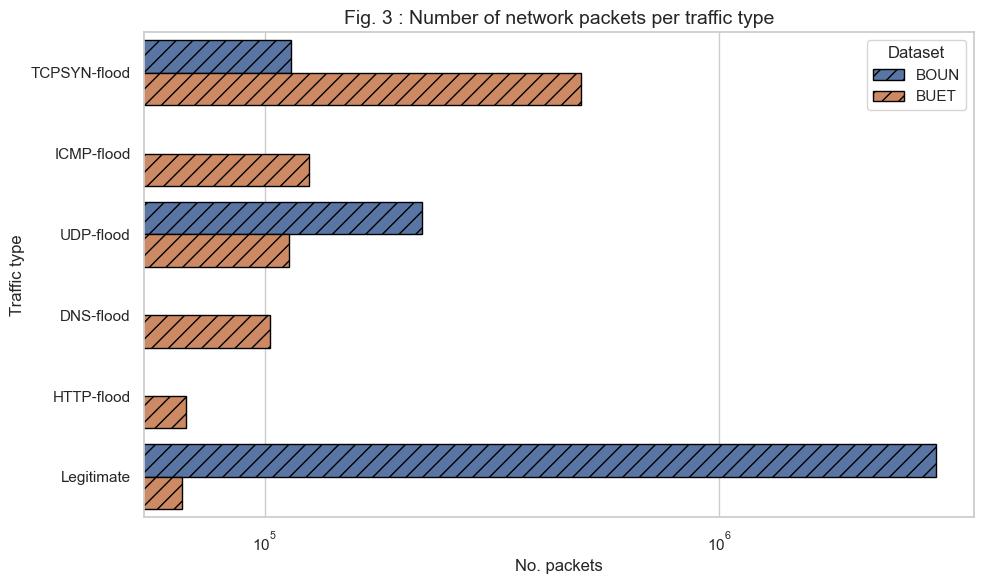


图表生成完毕！


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n====================================================")
print("===              复现论文图表 Fig. 3               ===")
print("====================================================")

# --- 步骤 1: 准备绘图所需的数据 ---
print("[INFO] 正在准备绘图数据...")

# 计算BOUN中各类别的数量
boun_counts = boun_aligned_df['Label'].value_counts().reset_index()
boun_counts.columns = ['Label', 'Count']
boun_counts['Dataset'] = 'BOUN' # 添加来源列

# 计算BUET中各类别的数量
buet_counts = buet_aligned_df['Label'].value_counts().reset_index()
buet_counts.columns = ['Label', 'Count']
buet_counts['Dataset'] = 'BUET' # 添加来源列

# 将两个计数结果合并成一个用于绘图的DataFrame
plot_df = pd.concat([boun_counts, buet_counts], ignore_index=True)

# --- 步骤 2: 统一标签以匹配图表中的名称 ---
# 这个映射关系可以确保Y轴的标签和顺序与原图一致
label_mapping = {
    'Legitimate': 'Legitimate',
    'TCPSYN-flood': 'TCPSYN-flood',
    'UDP-flood': 'UDP-flood',
    # BUET labels
    'Legitimate_traffic': 'Legitimate',
    'TCP_syn_flood_attack': 'TCPSYN-flood',
    'UDP_flood_attack': 'UDP-flood',
    'ICMP_flood_attack': 'ICMP-flood',
    'DNS_flood_attack': 'DNS-flood',
    'HTTP_flood_attack': 'HTTP-flood'
}
plot_df['Traffic type'] = plot_df['Label'].map(label_mapping)

# 定义Y轴的顺序，使其与原图完全一致
category_order = [
    'TCPSYN-flood', 
    'ICMP-flood', 
    'UDP-flood', 
    'DNS-flood', 
    'HTTP-flood', 
    'Legitimate'
]

print("绘图数据准备完成。")
print(plot_df)


# --- 步骤 3: 使用 Seaborn 和 Matplotlib 绘图 ---
print("\n[INFO] 正在生成图表...")

# 设置图表的美学风格
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6)) # 设置画布大小

# 创建条形图
# order=category_order 参数确保了Y轴的类别顺序
ax = sns.barplot(
    data=plot_df, 
    y='Traffic type', 
    x='Count', 
    hue='Dataset', 
    palette=['#4c72b0', '#dd8452'], # 蓝/橙配色
    order=category_order,
    edgecolor="black", # 为条形添加黑色边框，使其更像原图
    hatch="//" # 为条形添加斜线填充，模仿原图风格
)

# --- 关键步骤: 将X轴设置为对数坐标 ---
ax.set_xscale('log')

# 添加图表标题和轴标签 
ax.set_title('Fig. 3 : Number of network packets per traffic type', fontsize=14)
ax.set_xlabel('No. packets', fontsize=12)
ax.set_ylabel('Traffic type', fontsize=12) # Trattic -> Traffic

# 优化图例
ax.legend(title='Dataset', fontsize=11, loc='upper right')

# 调整布局以避免标签重叠
plt.tight_layout()

# 1. 定义保存图片的文件夹名称
output_folder = 'Figures'

# 2. 检查文件夹是否存在，如果不存在则创建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"\n[INFO] 已创建文件夹: '{output_folder}'")

# 3. 定义完整的文件路径
file_path = os.path.join(output_folder, 'Fig. 3. Number of network packets per traffic type for both datasets.png')

# 4. 保存图表
plt.savefig(file_path, dpi=300)
print(f"[INFO] 图表已保存至: '{file_path}'")

# 显示图表
plt.show()

print("\n图表生成完毕！")


===              复现论文图表 Fig. 4               ===
[INFO] 雷达图数据计算完成:
                  BOUN      BUET
TCPSYN-flood  0.037918  1.000000
ICMP-flood    0.000000  0.251676
UDP-flood     0.073773  0.228189
DNS-flood     0.000000  0.207121
HTTP-flood    0.000000  0.134937
Legitimate    1.000000  0.132270

[INFO] 正在生成雷达图...
[INFO] 图表已保存至: 'Figures\Fig. 4. Distribution of class skew on the used datasets..png'


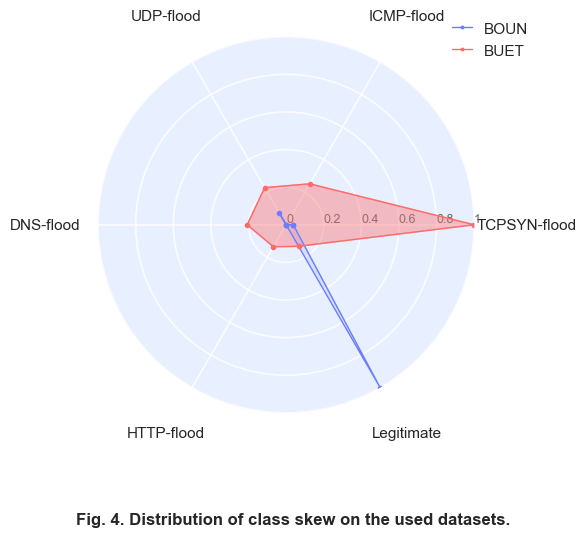


雷达图生成完毕！


In [22]:
from matplotlib.lines import Line2D

print("\n====================================================")
print("===              复现论文图表 Fig. 4               ===")
print("====================================================")

# --- 步骤 1: 准备绘图所需的数据 ---
categories = [
    'TCPSYN-flood', 
    'ICMP-flood', 
    'UDP-flood', 
    'DNS-flood', 
    'HTTP-flood', 
    'Legitimate'
]

label_mapping = {
    'Legitimate': 'Legitimate', 'TCPSYN-flood': 'TCPSYN-flood', 'UDP-flood': 'UDP-flood',
    'Legitimate_traffic': 'Legitimate', 'TCP_syn_flood_attack': 'TCPSYN-flood',
    'UDP_flood_attack': 'UDP-flood', 'ICMP_flood_attack': 'ICMP-flood',
    'DNS_flood_attack': 'DNS-flood', 'HTTP_flood_attack': 'HTTP-flood'
}

radar_data = {}

# 计算 BOUN 数据集的比例
boun_counts = boun_aligned_df['Label'].map(label_mapping).value_counts()
boun_max_count = boun_counts.max()
boun_ratios = boun_counts / boun_max_count
radar_data['BOUN'] = [boun_ratios.get(cat, 0) for cat in categories]

# 计算 BUET 数据集的比例
buet_counts = buet_aligned_df['Label'].map(label_mapping).value_counts()
buet_max_count = buet_counts.max()
buet_ratios = buet_counts / buet_max_count
radar_data['BUET'] = [buet_ratios.get(cat, 0) for cat in categories]

print("[INFO] 雷达图数据计算完成:")
print(pd.DataFrame(radar_data, index=categories))

# --- 步骤 2: 使用 Matplotlib 绘制雷达图 ---
print("\n[INFO] 正在生成雷达图...")

# 设置雷达图的角度
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# 创建图和子图 - 修改尺寸为 6x6 更紧凑
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 绘制 BOUN 数据
values_boun = radar_data['BOUN'] + radar_data['BOUN'][:1]
ax.plot(angles, values_boun, color='#6B7FFF', linewidth=1, linestyle='solid', label='BOUN', marker='o', markersize=3)
ax.fill(angles, values_boun, color='#6B7FFF', alpha=0.15)

# 绘制 BUET 数据
values_buet = radar_data['BUET'] + radar_data['BUET'][:1]
ax.plot(angles, values_buet, color='#FF6B6B', linewidth=1, linestyle='solid', label='BUET', marker='o', markersize=3)
ax.fill(angles, values_buet, color='#FF6B6B', alpha=0.4)

# === 关键修改部分 ===

# 1. 设置淡蓝色背景
ax.set_facecolor('#E8F0FF')  # 淡蓝色背景
fig.patch.set_facecolor('white')

# 2. 显示径向刻度标签
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], size=9, color='#666666')
ax.set_ylim(0, 1)
ax.set_rlabel_position(0)

# 3. 设置X轴的类别标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, weight='normal')
ax.tick_params(axis='x', which='major', pad=25)

# 4. 设置网格线样式
ax.grid(color='white', linestyle='-', linewidth=1.2, alpha=0.8)

# 5. 隐藏外围的圆形边框
ax.spines['polar'].set_visible(False)

# # 6. 调整图例位置 - 放在图内右上角
ax.legend(loc='upper right', 
          bbox_to_anchor=(1.18, 1.08), frameon=False, fontsize=11, markerscale=0.6, 
          handlelength=1.3, handleheight=1.2, labelspacing=0.4)

# 7. 标题放在底部
plt.figtext(0.5, 0.02, 'Fig. 4. Distribution of class skew on the used datasets.', 
            ha='center', size=12, weight='bold')

# 调整布局，为底部标题留出空间
plt.tight_layout(rect=[0, 0.05, 1, 1])

# === 保存图片 ===
output_folder = 'Figures'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"\n[INFO] 已创建文件夹: '{output_folder}'")

file_path = os.path.join(output_folder, 'Fig. 4. Distribution of class skew on the used datasets..png')
plt.savefig(file_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"[INFO] 图表已保存至: '{file_path}'")

plt.show()
print("\n雷达图生成完毕！")